In [1]:
# Usual imports
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn import datasets

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import preprocessing


In [2]:
# import some data to play with
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

y_name = ['Setosa', 'Versicolour', 'Virginica']

In [3]:
clustering = AgglomerativeClustering(linkage="complete", n_clusters=3)

clustering.fit(X);

In [4]:
# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.

X_plot = preprocessing.MinMaxScaler().fit_transform(X)

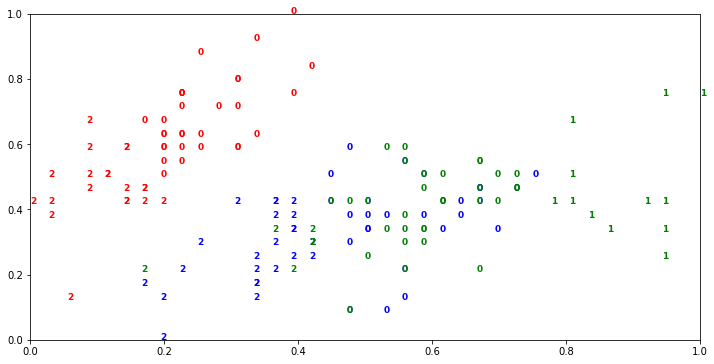

In [5]:
colours = 'rbg'
plt.figure(figsize=(12, 6))

for i in range(X.shape[0]):
    
    plt.text(X_plot[i, 0], X_plot[i, 1], 
             str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

# plt.xticks([])
# plt.yticks([])
# plt.axis('off')

### using scipy 

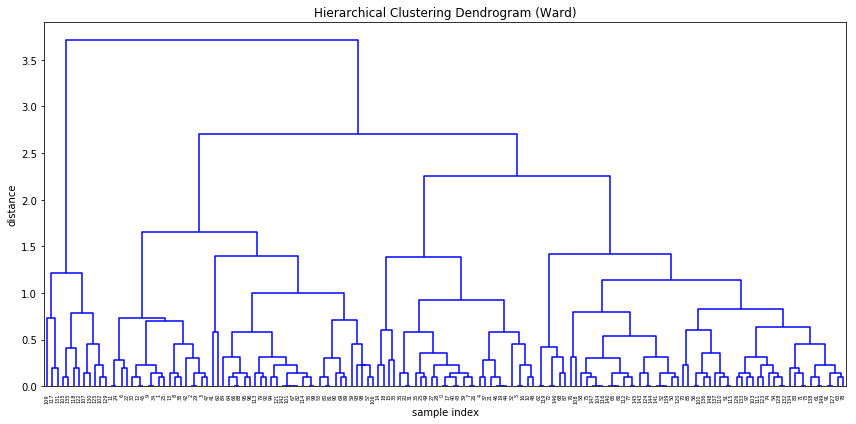

In [6]:
linkage_matrix = linkage(X, 'complete')

figure = plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)


plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()